Problem2 part a

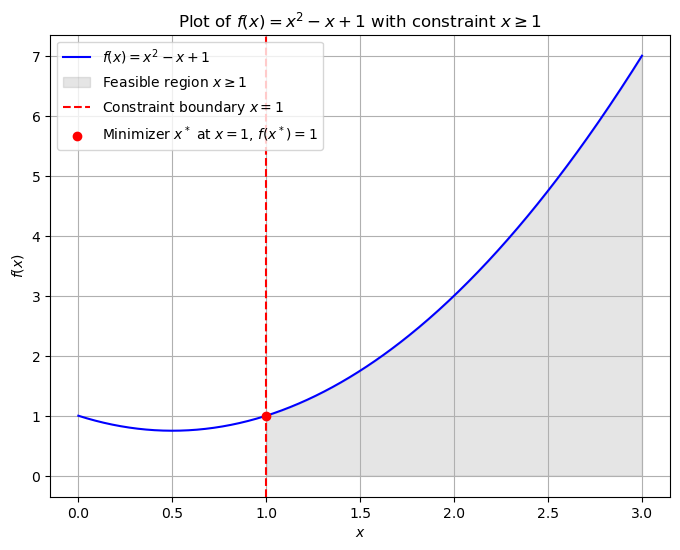

[1/2]

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve
from scipy.optimize import minimize

# Objective function
def f(x):
    return x**2 - x + 1

# Plot the objective function and the feasible set
x = np.linspace(0, 3, 400)
y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$f(x) = x^2 - x + 1$', color='blue')
plt.fill_between(x, y, where=(x >= 1), color='gray', alpha=0.2, label="Feasible region $x \\geq 1$")
plt.axvline(x=1, color='red', linestyle='--', label='Constraint boundary $x = 1$')
plt.scatter(1, f(1), color='red', zorder=5, label=f'Minimizer $x^*$ at $x=1$, $f(x^*)={f(1)}$')

# Labels and titles
plt.title('Plot of $f(x) = x^2 - x + 1$ with constraint $x \\geq 1$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

x = symbols('x')
f_expr = x**2 - x + 1
f_prime = diff(f_expr, x)  # Derivative of f(x)
minimizer = solve(f_prime, x)
minimizer

f(x)=x^2−x+1
d/dx (f(x))=2x-1=0
x=1/2
f(1)=1^2-1+1=1

Problem2 part b

L(x,λ)=x^2−x+1+λ(1−x)
dL/dx = 2x−1−λ=0
x=1+λ/2

In [30]:
from sympy import lambdify

# Define Lagrangian primal function
lambda_ = symbols('lambda')
L_x_lambda = f_expr + lambda_ * (1 - x)

# Minimize the Lagrangian with respect to x (for each value of lambda)
L_prime_x = diff(L_x_lambda, x)
x_min = solve(L_prime_x, x)[0]  # Critical point

# Substitute the critical point back into L(x, lambda) to get the dual function
L_dual = L_x_lambda.subs(x, x_min)
L_dual

lambda*(1/2 - lambda/2) - lambda/2 + (lambda/2 + 1/2)**2 + 1/2

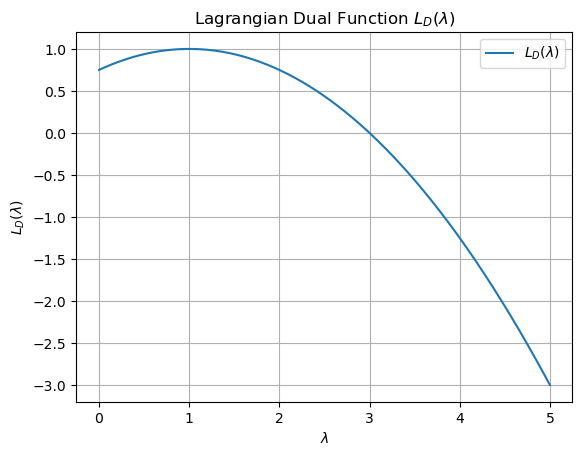

In [29]:
# Convert to numerial fucntion
L_dual_func = lambdify(lambda_, L_dual, 'numpy')

# Generate lambda values for plotting
lambda_values = np.linspace(0, 5, 400)  
L_dual_values = L_dual_func(lambda_values)

# Plot the dual function
plt.plot(lambda_values, L_dual_values, label="$L_D(\\lambda)$")
plt.title('Lagrangian Dual Function $L_D(\\lambda)$')
plt.xlabel('$\\lambda$')
plt.ylabel('$L_D(\\lambda)$')
plt.grid(True)
plt.legend()
plt.show()

Problem2 part d

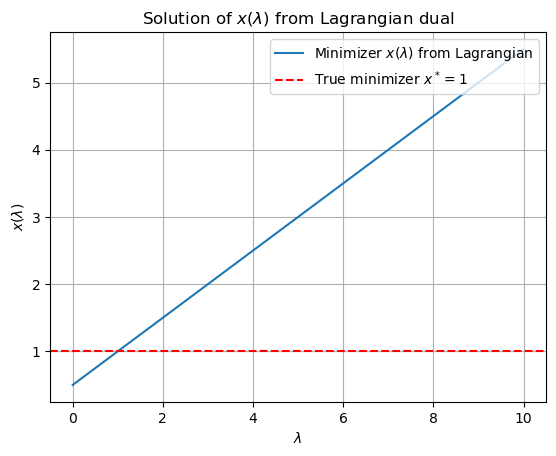

In [25]:
def lagrangian(x, lam):
    return x**2 - x + 1 + lam * (1 - x)

# Minimize the Lagrangian with respect to x for a given lambda
def minimize_lagrangian(lam):
    result = minimize(lambda x: lagrangian(x, lam), x0=2)
    return result.x[0]

# Solve for the best lambda
lambdas = np.linspace(0, 10, 100)
x_values = [minimize_lagrangian(lam) for lam in lambdas]

# Plot the Lagrangian solutions
plt.plot(lambdas, x_values, label="Minimizer $x(\\lambda)$ from Lagrangian")
plt.axhline(1, color='red', linestyle='--', label="True minimizer $x^* = 1$")
plt.title("Solution of $x(\\lambda)$ from Lagrangian dual")
plt.xlabel("$\\lambda$")
plt.ylabel("$x(\\lambda)$")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()